# Project: Problem Statement - Personal Loan Campaign Modelling

## Thera Bank Personal Loan Campaign
 
### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 
### Domain:
Banking


### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 
### Attribute Information:
<li>ID: Customer ID</li>
<li>Age: Customer's age in completed years</li>
<li>Experience: #years of professional experience</li>
<li>Income: Annual income of the customer (,000)</li>
<li>ZIP Code: Home Address ZIP</li>
<li>Family: Family size of the customer</li>
<li>CCAvg: Avg. spending on credit cards per month (,000)</li>
<li>Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional</li>
<li>Mortgage: Value of house mortgage if any. (,000)</li>
<li>Personal Loan: Did this customer accept the personal loan offered in the last campaign?</li>
<li>Securities Account: Does the customer have a securities account with the bank?</li>
<li>CD Account: Does the customer have a certificate of deposit (CD) account with the bank?</li>
<li>Online: Does the customer use internet banking facilities?</li>
<li>Credit card: Does the customer use a credit card issued by the bank?</li>
 
 
### Learning Outcomes:
<li>Exploratory Data Analysis</li>
<li>Preparing the data to train a model</li>
<li>Training and making predictions using a classification model</li>
<li>Model evaluation</li>
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
### Steps and tasks:
<ol>
<li>Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.</li>
<li>EDA: Study the data distribution in each attribute and target variable, share your findings </li>
<ul>
    <li>Number of unique in each column?</li>
    <li>Number of people with zero mortgage?</li>
    <li>Number of people with zero credit card spending per month?</li>
    <li>Value counts of all categorical columns.</li>
    <li>Univariate and Bivariate</li>
    <li>Get data model ready</li>
</ul>
<li>Split the data into training and test set in the ratio of 70:30 respectively</li>
<li>Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix</li> 
<li>Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.</li>
<li>Give conclusion related to the Business understanding of your model?</li>

### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
#importing all the libraries ahead 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
loan_pd = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  #Reading the dataset into dataframe

In [3]:
loan_pd.head(50) #Checking the values of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
loan_pd.info() #Checking all the column datatype and  No. of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
loan_pd.shape #No. of rows & columns in the dataframe

(5000, 14)

In [6]:
loan_pd.describe().T #Statistical Summary of the dataset. 

#See an issue here with Experience. Min of it is in negative which doesn't sound logical.
#Feel 2 options appropriate here to tacke this problem -
#Option 1: Consider all expierence below zero as zero
#Option 2: Convert negative expierence to positive

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
loan_pd.isnull().values.any() # No null values present in any of the columns

False

In [8]:
loan_pd[loan_pd['Experience'] < 0].sort_values(by=['Age']) #Rows having Expierence below Zero

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
3130,3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
3425,3426,23,-1,12,91605,4,1.00,1,90,0,0,0,1,0
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
909,910,23,-1,149,91709,1,6.33,1,305,0,0,0,0,1
3824,3825,23,-1,12,95064,4,1.00,1,0,0,1,0,0,1
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1
4285,4286,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0
3157,3158,23,-1,13,94720,4,1.00,1,84,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0


### EDA: Study the data distribution in each attribute and target variable, share your findings
<ul>
    <li>Number of unique in each column?</li>
    <li>Number of people with zero mortgage?</li>
    <li>Number of people with zero credit card spending per month?</li>
    <li>Value counts of all categorical columns.</li>
    <li>Univariate and Bivariate</li>
    <li>Get data model ready</li>
</ul>

In [9]:
loan_pd.nunique()  #No. of uniques in each columns
#Education, Family, Securities Account, CD Account, Online and CreditCard can be treated as categorical variables
#Age, Experience, Income, Mortgage, Zip Code and CCAvg can be treated as continous variables
#I feel Zip Code can be treated as categorical variable in special scenarios. E.g. if we are predicting data for
# a state or a county

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
loan_pd[loan_pd['Mortgage'] == 0] #There 3462(69.24%) without any mortgage

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
loan_pd[loan_pd['CCAvg'] == 0] #There 106(2.12%) without any credit card spending per month

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17,32,94523,4,0.0,2,0,0,0,0,1,0
128,129,38,14,74,92182,2,0.0,1,0,0,1,0,1,0
198,199,27,3,59,94123,4,0.0,1,90,0,1,0,1,0
210,211,51,26,20,92131,2,0.0,1,0,0,0,0,0,0
215,216,38,14,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10,88,94404,2,0.0,1,121,0,0,0,1,0
4826,4827,56,31,81,93943,2,0.0,3,225,0,0,0,0,0
4837,4838,36,10,183,95348,2,0.0,1,0,0,0,0,0,0
4910,4911,48,22,120,90291,1,0.0,1,0,0,0,0,1,0


In [12]:
loan_pd['Education'].value_counts() 
#41.92% ppl are Under Graduate
#28.06% ppl are Graduate
#30.02% ppl are Advanced/Professional

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [13]:
loan_pd['Family'].value_counts()
#29.44% ppl have family of 1
#25.92% ppl have family of 2
#24.44% ppl have family of 3
#20.20% ppl have family of 4

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [14]:
loan_pd['Securities Account'].value_counts()
#89.56% don't have securities account with the bank
#10.44% have securities account with the bank

0    4478
1     522
Name: Securities Account, dtype: int64

In [15]:
loan_pd['CD Account'].value_counts()
#93.96% don't have certificate deposit with the bank
#6.04% have certificate deposit with the bank

0    4698
1     302
Name: CD Account, dtype: int64

In [16]:
loan_pd['Online'].value_counts()
#40.32% don't use internet banking facilities
#59.68% use internet banking facilities

1    2984
0    2016
Name: Online, dtype: int64

In [17]:
loan_pd['CreditCard'].value_counts()
#70.6% don't use a credit card issued by the bank
#29.4% use a credit card issued by the bank

0    3530
1    1470
Name: CreditCard, dtype: int64

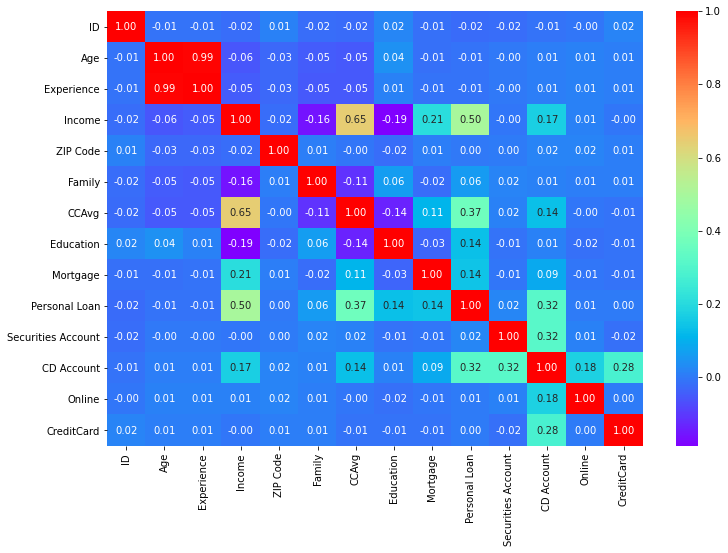

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_pd.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

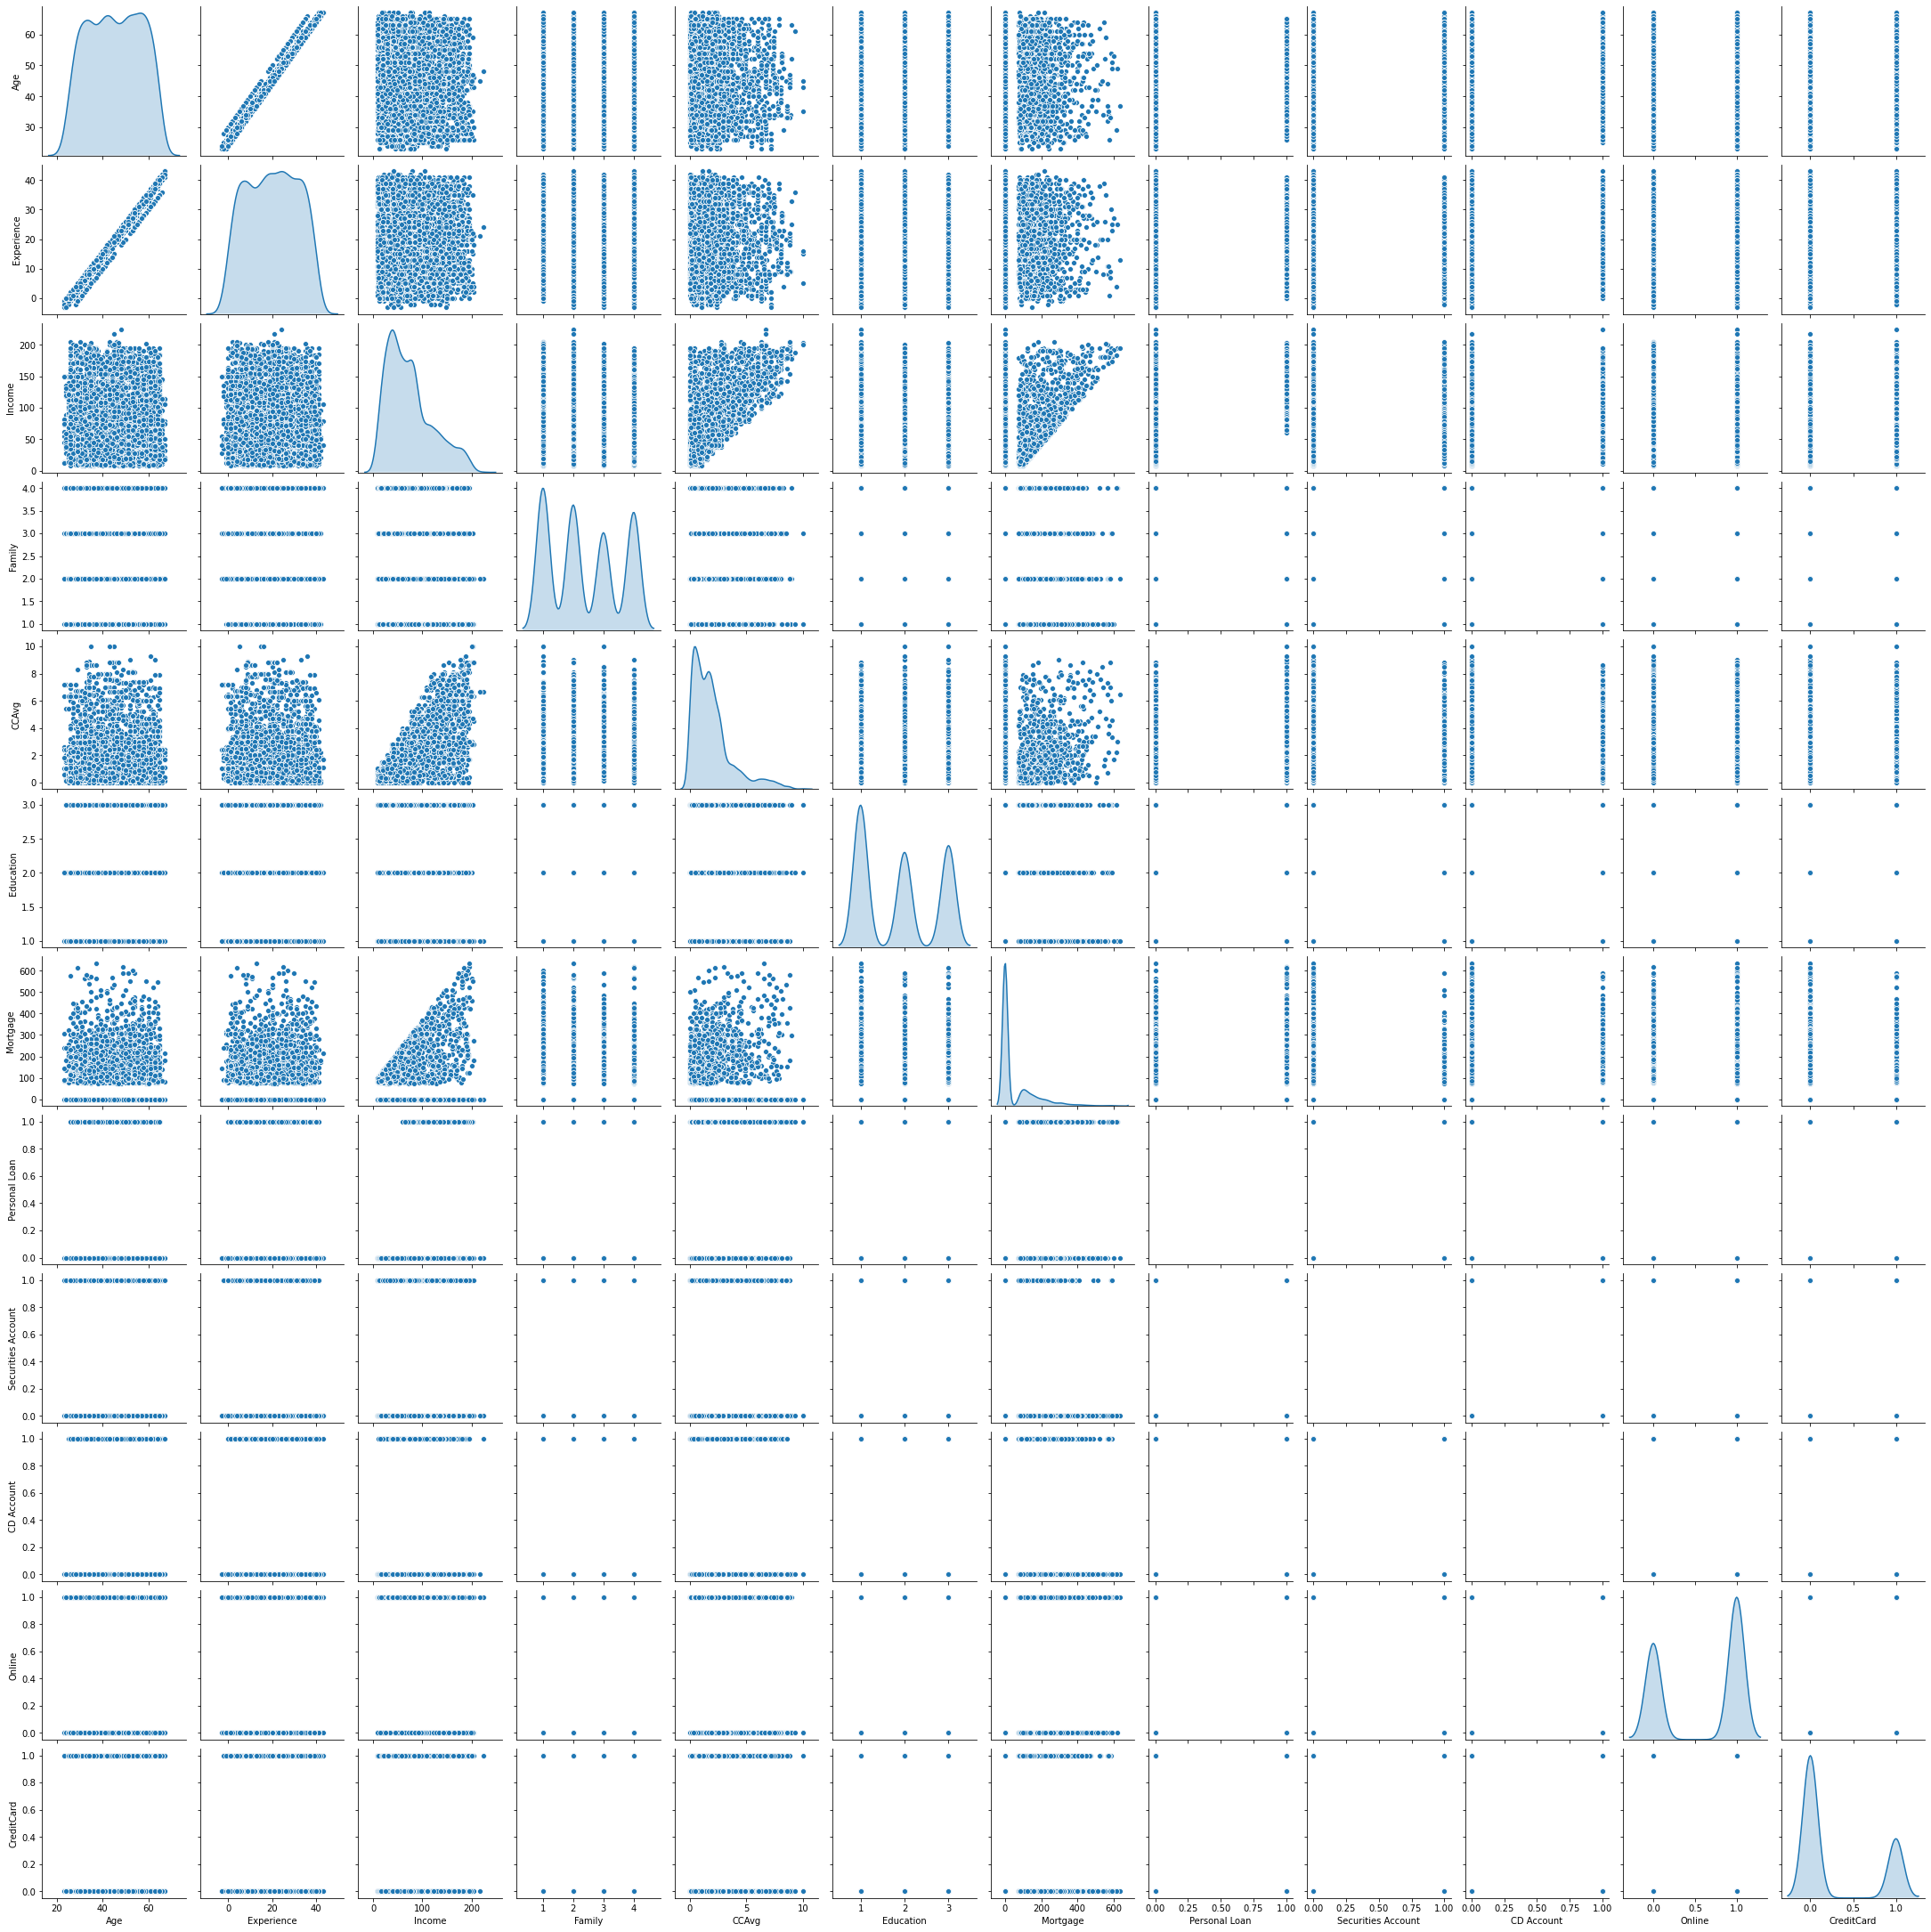

In [19]:
sns.pairplot(loan_pd.drop(['ID','ZIP Code'],axis=1) ,diag_kind='kde')

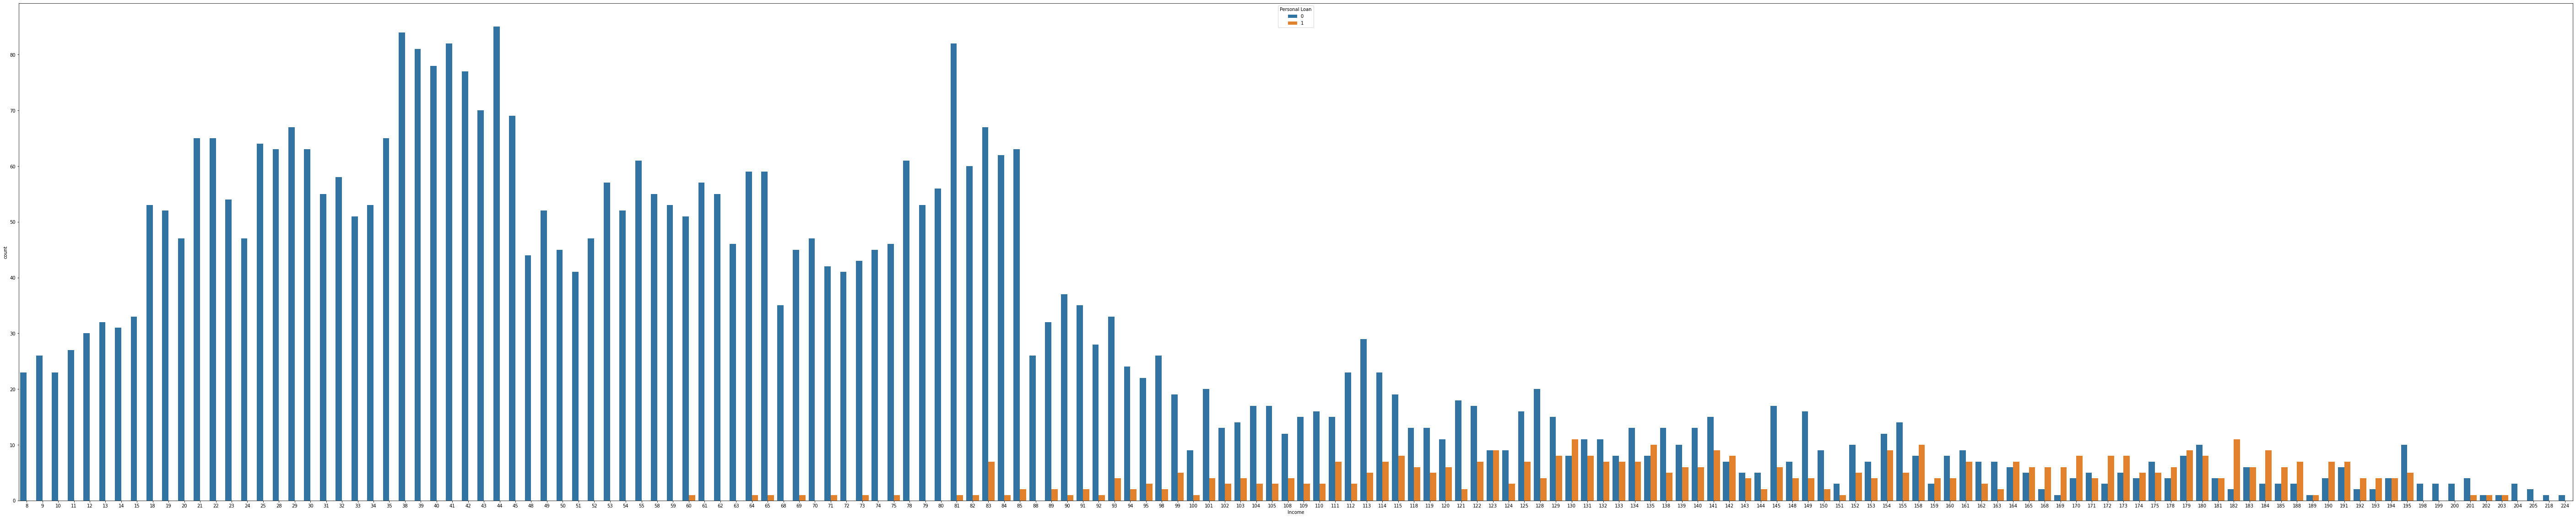

In [20]:
plt.figure(figsize=(100,20))
sns.countplot(loan_pd['Income'], hue = loan_pd['Personal Loan'])
plt.show()
#This chart shows that higer income accepted personal loan offered
# People above income level of 60k have accept all the personal loan offer

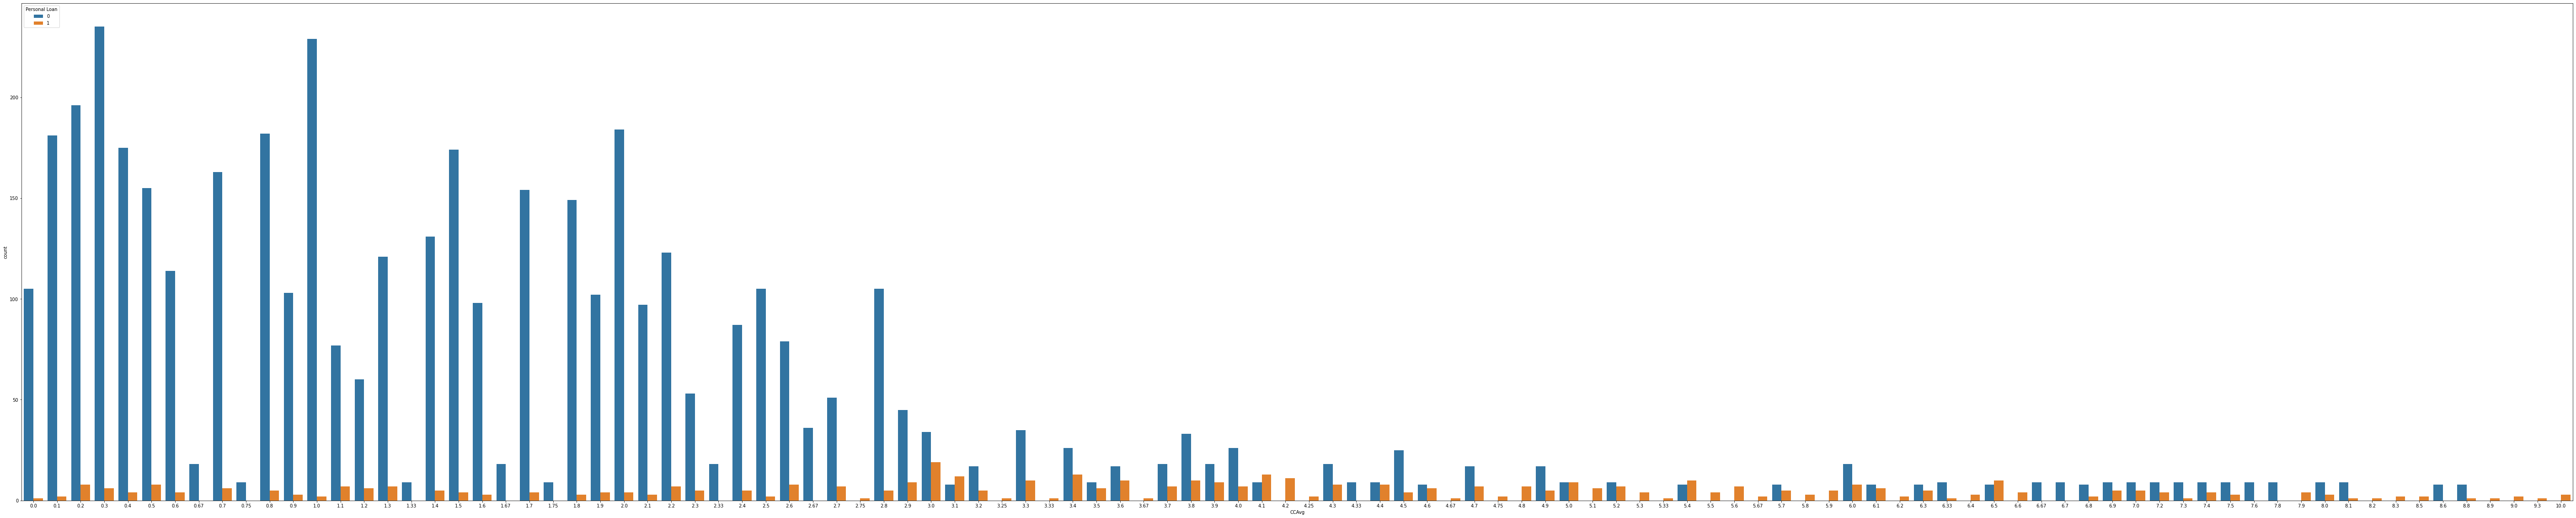

In [21]:
plt.figure(figsize=(100,20))
sns.countplot(loan_pd['CCAvg'], hue = loan_pd['Personal Loan'])
plt.show()
#This chart shows ppl with high spending on credit card have accepted personal loan offered 

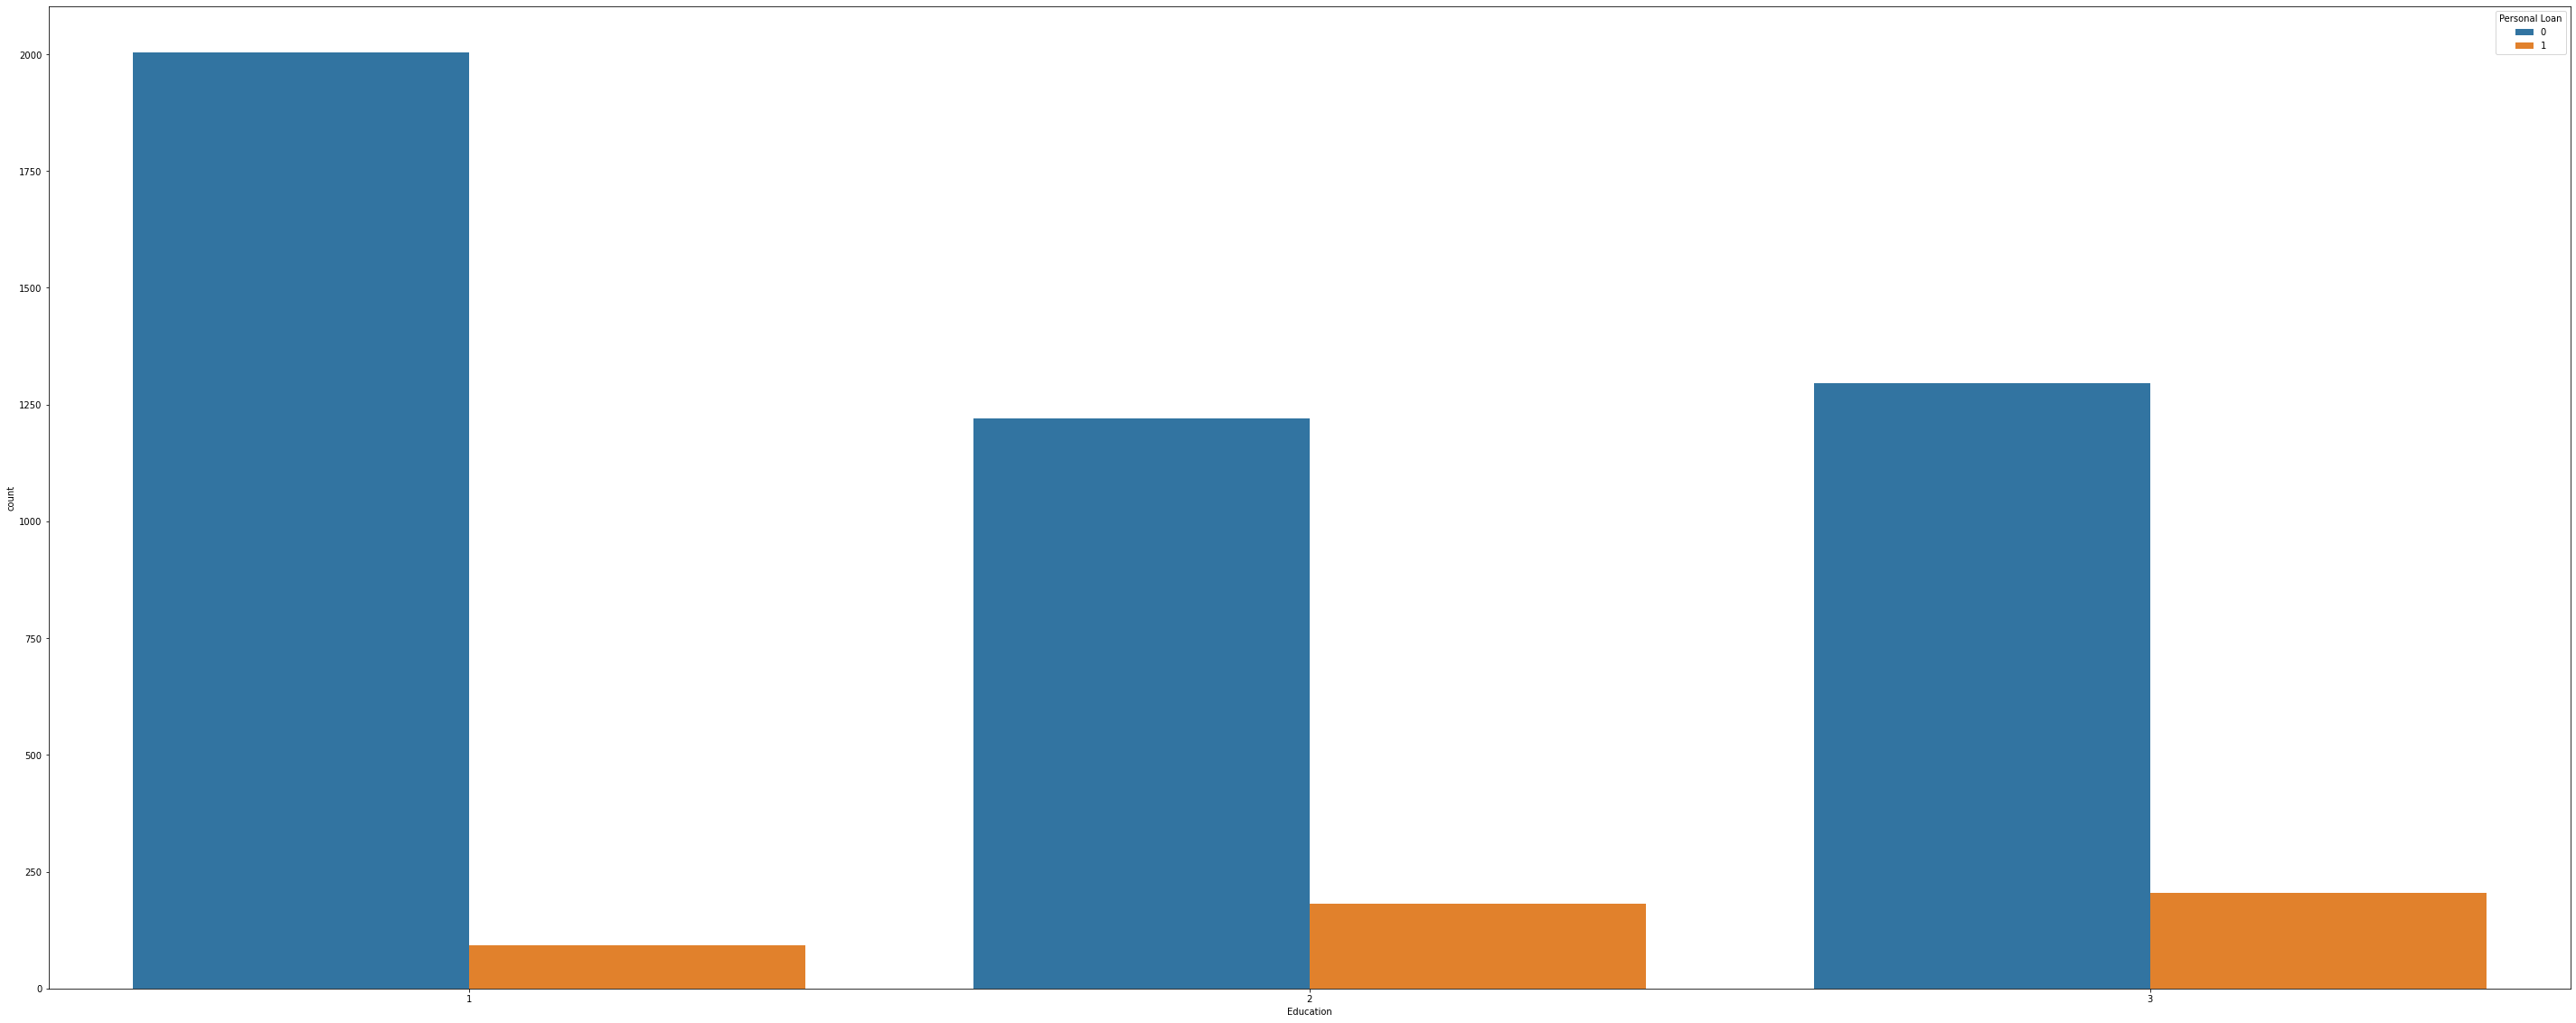

In [22]:
plt.figure(figsize=(50,20))
sns.countplot(loan_pd['Education'], hue = loan_pd['Personal Loan'])
plt.show()
#This chart shows ppl with diffent education level have accepted personal loan offered
#Under grad have rejected the most personal loan offer compared to accepting it

In [23]:
#Replacing -ve experience with zero since -ve experience doesn't seems logical  
loan_pd['Experience'] = np.where((loan_pd.Experience < 0), 0, loan_pd.Experience) 
loan_pd.describe().T #Making sure min experience is zero now

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [24]:
#Creating dummies of Family & Education for one hot encoding
loan_pd_dummies =  pd.get_dummies(loan_pd, columns=['Family', 'Education'])
X = loan_pd_dummies.drop(['ID','Personal Loan','Family_4','Education_3','ZIP Code','Age'],axis=1)
Y = loan_pd_dummies['Personal Loan']
X.head()

,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
0,1,49,1.6,0,1,0,0,0,0,0,0,1,0
1,19,34,1.5,0,1,0,0,0,0,0,1,1,0
2,15,11,1.0,0,0,0,0,0,1,0,0,1,0
3,9,100,2.7,0,0,0,0,0,1,0,0,0,1
4,8,45,1.0,0,0,0,0,1,0,0,0,0,1


### Split the data into training and test set in the ratio of 70:30 respectively

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

x_train.head()

,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
2599,20,71,2.0,0,0,0,0,1,0,0,0,0,0
3847,18,94,1.1,0,0,0,0,0,0,0,0,0,1
1012,25,40,1.3,0,0,0,1,1,1,0,0,0,1
3714,23,65,0.4,232,0,0,0,1,0,1,0,0,0
3080,22,40,2.2,87,0,0,1,0,0,0,1,0,1


In [26]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan_pd_dummies.loc[loan_pd_dummies['Personal Loan'] == 1]), (len(loan_pd_dummies.loc[loan_pd_dummies['Personal Loan'] == 1])/len(loan_pd_dummies.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan_pd_dummies.loc[loan_pd_dummies['Personal Loan'] == 0]), (len(loan_pd_dummies.loc[loan_pd_dummies['Personal Loan'] == 0])/len(loan_pd_dummies.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 332 (9.49%)
Training Personal Loan False Values   : 3168 (90.51%)

Test Personal Loan True Values        : 148 (9.87%)
Test Personal Loan False Values       : 1352 (90.13%)



### Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix

In [27]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

In [28]:
model_score = model.score(x_train, y_train)
print("Training Model Score    : {0:0.2f}% ".format(model_score* 100))

Training Model Score    : 96.26% 


In [29]:
model_score = model.score(x_test, y_test)
print("Testing Model Score    : {0:0.2f}% ".format(model_score* 100))

Testing Model Score    : 96.07% 


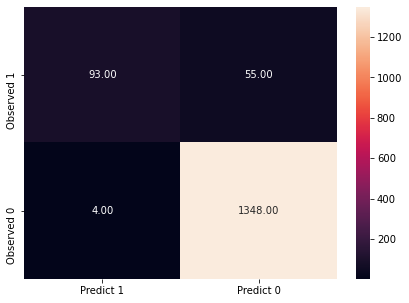

In [30]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Observed 1","Observed 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that 93 people would accept personal loan 

True Negatives (TN): we correctly predicted that 1348 people would not accept personal loan 

False Positives (FP): we incorrectly predicted that 4 people would accept personal loan (a "Type I error") 

False Negatives (FN): we incorrectly predicted that 55 people would not accept personal loan (a "Type II error") 

In [31]:
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.6283783783783784

Precision: 0.9587628865979382

F1 Score: 0.7591836734693878

Roc Auc Score: 0.8127098992483608


### Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.

In [32]:
coef_df = pd.DataFrame(model.coef_, columns=['Experience','Income','CCAvg','Mortgage','Securities Account','CD Account','Online','CreditCard','Family_1','Family_2','Family_3','Education_1','Education_2'])
coef_df['intercept'] = model.intercept_
coef_df

,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2,intercept
0,0.002944,0.05534,0.13512,0.0005,-0.487227,2.699005,-0.712682,-0.837954,-1.473573,-1.442009,0.091788,-3.690624,-0.074249,-6.18315


In [33]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,Education_1,3.69
5,CD Account,2.70
8,Family_1,1.47
9,Family_2,1.44
7,CreditCard,0.84
6,Online,0.71
4,Securities Account,0.49
2,CCAvg,0.14
10,Family_3,0.09
12,Education_2,0.07


In [34]:
x_test[y_predict != y_test]

,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
4565,8,120,4.20,76,0,0,0,1,0,1,0,0,0
3573,36,165,5.60,0,0,0,0,1,0,0,1,1,0
3571,18,153,5.60,416,0,0,0,0,0,0,1,1,0
2539,7,98,4.20,171,1,1,0,0,1,0,0,1,0
1407,39,101,3.90,294,0,0,1,0,0,1,0,0,0
2194,9,123,1.60,0,0,0,1,0,1,0,0,0,1
1177,3,71,3.30,149,1,1,1,0,1,0,0,0,1
1225,6,118,2.80,0,0,0,0,0,0,1,0,0,1
537,20,131,4.90,0,0,0,1,0,1,0,0,0,0
3517,6,95,3.90,146,0,0,0,1,1,0,0,0,0


### Give conclusion related to the Business understanding of your model? 

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that customer shall accept personal loan and observed is same as well

*False Positive (observed=0,predicted=1):*

Predicted that customer shall accept personal loan but in reailty customer rejected personal loan

*True Negative (observed=0,predicted=0):*

Predicted that customer shall reject personal loan and observed is same as well


*False Negative (observed=1,predicted=0):*

Predicted that customer shall reject personal loan but in reailty customer accepted the loan

##### `Important Features`

"Education Under grad", "CD Account", "Credit Card", "Online", "Securities Account"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Mortgage", "Experience"

have coefficients value as 0 so these feature doesn't help model in predicting target variable.


##### `Important Metric`

Here the bank want more personal loan customers i.e. **less number of False Negative**, if FN is high bank would lose customer that would accept personal loan. Hence **Recall is the important metric**.

In case of False positive is high then bank will lose some money on customer not accepting loan.

